# Evaluating Mode Collapse and Mode Dropping using Diversipy

**Mode collapse** and **mode dropping** are two commonly faced problems in evaluating generative models related to a decrease in output diversity as compared to the input/training data. 

- **Mode dropping** occurs when a model fails to capture all parts of an input distribution. Specifically, a model that suffers from this problem "drops" a category or distinct cluster of data ("mode") in its output, so that modes are underrepresented in the generated outputs. For example, we would consider a model trained to generate images of animals that never outputs a image of a bird to suffer from mode dropping.

- **Mode collapse** describes the lack of diversity within modes. For example, a model trained to on a wide variety of dog pictures suffers from mode collapse if it only ever outputs images of almost identical-looking dogs failing to capture the full diversity of this image class.  

Both mode collapse and mode dropping can be detected using `Diversipy` by computing MagDiff between the output data and the input data (reference dataset). Higher MagDiffs measuring larger differences in diversity indicate greater likelihood of mode dropping and/or collapse. By evaluating differences in diversity across multiple scales, MagDiff is shown to detect mode dropping and collapse earlier than existing generative model evaluation metrics.

We include the following demo to show how `Diversipy` can be used to evaluate mode dropping and collapse for generative model evaluation.

## Importing Packages and Datasets

In [4]:
# Import statements
from matplotlib.animation import FuncAnimation
from magnipy import Magnipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tutorial_data import *

We begin by creating our toy dataset by sampling from three Gaussians to create **three distinct modes** (clusters).

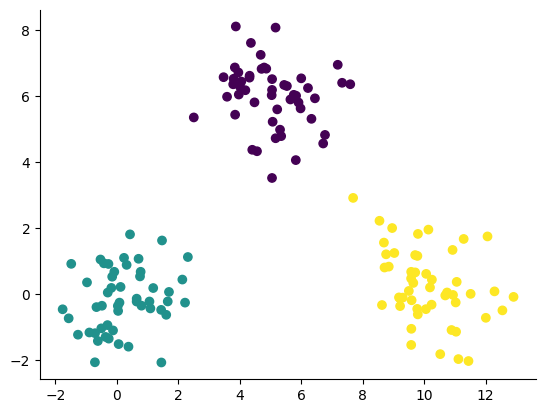

In [ ]:
# Setting hyperparameters
np.random.seed(4)
mean1 = [5, 6]
cov1 = np.eye(2) * 1.1
size = 50

# Sampling data
points1 = sample_points_gaussian(mean1, cov1, size)
points2 = sample_points_gaussian([0, 0], cov1, size)
points3 = sample_points_gaussian([10, 0], cov1, size)
make_blobs = np.concatenate([points1, points2, points3], axis=0)
x = make_blobs[:, 0]
y = make_blobs[:, 1]
more_points1 = sample_points_gaussian(mean1, cov1, size * 2)

# Plotting
colors = np.array(np.concatenate([np.zeros(size), np.ones(size), np.ones(size) * 2]))
plt.scatter(x, y, c=colors)
sns.despine()

## Simulating Mode Dropping

Next, **we simulate mode dropping** by iteratively removing 1 point from each of the 'green' and 'yellow' modes and adding two new points sampled from same Gaussian that made the purple mode. This effectively replaces two points from other modes with two points in the purple mode, i.e. "dropping" the green and yellow modes. As you would expect, as more points are replaced (i.e. more mode dropping occurs), the diversity of the perturbed dataset declines.

MovieWriter ffmpeg unavailable; using Pillow instead.


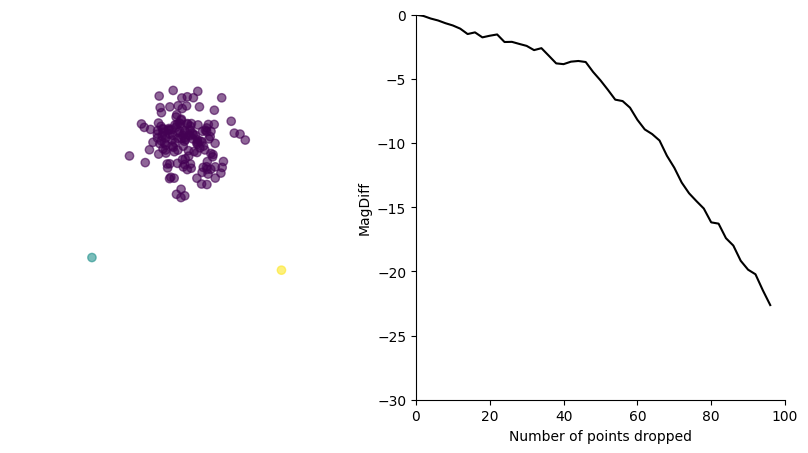

In [6]:
# Plots the result of the mode-dropping simulation
simulate_mode_dropping(is_normalised=False)

## MagDiff Reliably Detects Mode Dropping

At each iteration of this replacement process detailed above, we compute the **MagDiff between our original dataset and the latest iteration of our replacement dataset.** We observe that the more points have been perturbed the higher the decrease in diversity the higher the absolute MagDiff.

Below, we plot the MagDiff as a function of the number of points that have been dropped/replaced. Note that the negative MagDiff here captures the idea that the diversity of the perturbed dataset is declining as more points are dropped.

Let $t_{ref}$ be the convergence scale of the reference space $X_{\text{ref}}$ and $X_{p}$ is the perturbed data. Then we compute: $$\text{MagDiff} = \frac{1}{t_{\text{ref}}} \int_{0}^{t_{\text{ref}}} \text{Mag}_{X_{p}}(t) - \text{Mag}_{X_{\text{ref}}}(t) \text{dt}$$ We have that this difference can be negative if the diversity of $X_{\text{ref}}$ is higher than of $X_{p}$. Also, note that we choose to scale the integral by the convergence scale of the reference $t_{ref}$ to remove the impact of the scale of $t$ on the final result. 

![Mode Dropping Simulation](./assets/mode_dropping.gif)

We can also visualize this process by plotting the **normalised MagDiff**, that is, the MagDiff between the original dataset and the replacement dataset divided by the MagArea of the original dataset. Recall that MagDiff is the difference in the diversity of the original dataset (a constant) and the replacement dataset (steadily decreasing), and thus grows over time. Normalising simply changes the scale of the y-axis by  plotting the difference in diversity relative to the diversity of the reference.
$$\text{MagDiff} = \frac{1}{\text{MagArea}(X_{\text{ref}})} \int_{0}^{t_{\text{ref}}} \text{Mag}_{X_{p}}(t) - \text{Mag}_{X_{\text{ref}}}(t) \text{dt}$$

![Mode Dropping Simulation (Normalised)](./assets/mode_dropping_normalised.gif)

## Extended Results for Evaluating Graph Generative Models

MagDiff can thus be a helpful tool for detecting mode dropping and mode collapse in ML. In fact, the normalized MagDiff (in the demo directly above) even outperforms other commonly used detection techniques.

![Comparison with Other was](..//assets/mode_dropping/mode_collapse_comparison.png)

Figure from [Metric Space Magnitude for Evaluating the Diversity of Latent Representations](https://arxiv.org/abs/2311.16054). See also for further discussion.